In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
# import Data

train_df = pd.read_csv('../data/raw/application_train.csv')
test_df = pd.read_csv('../data/raw/application_test.csv') 

In [5]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (307511, 122)
Test shape: (48744, 121)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

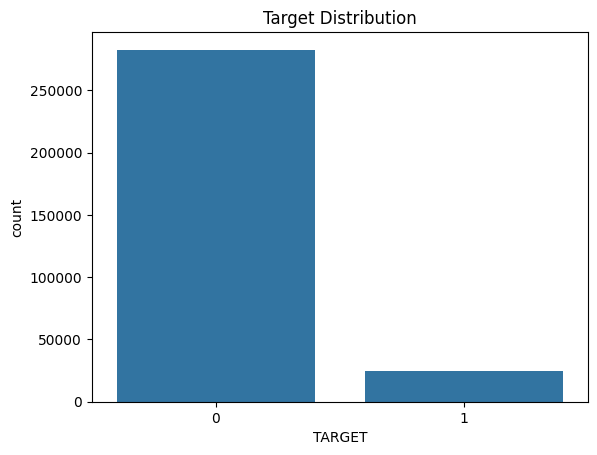

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [8]:
# Plot Class distribution

sns.countplot(x='TARGET', data=train_df)
plt.title('Target Distribution')
plt.show()

print(train_df['TARGET'].value_counts(normalize=True))

In [9]:
# Calculate % of missing vlaues

missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_percentage = (missing_values / train_df.shape[0]) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_df.head(20)


,Missing Values,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


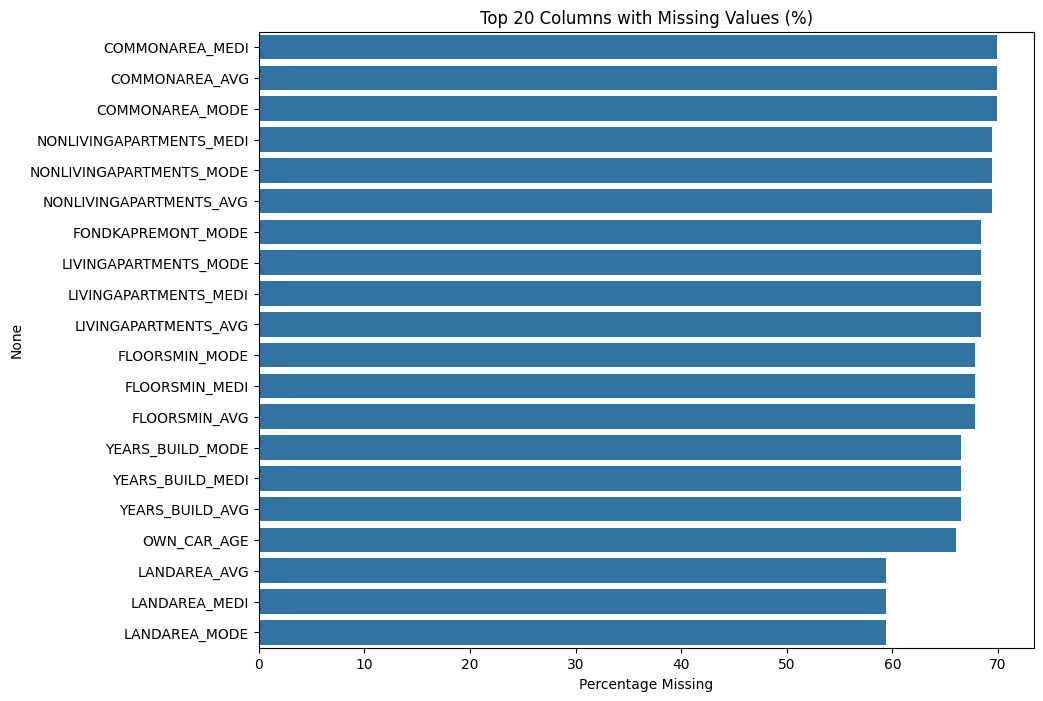

In [10]:

plt.figure(figsize=(10, 8))
sns.barplot(x=missing_percentage[:20], y=missing_percentage.index[:20])
plt.title("Top 20 Columns with Missing Values (%)")
plt.xlabel("Percentage Missing")
plt.show()

In [11]:
# calculating the number of num and cat columns 

numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numerical columns: 106
Categorical columns: 16


In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


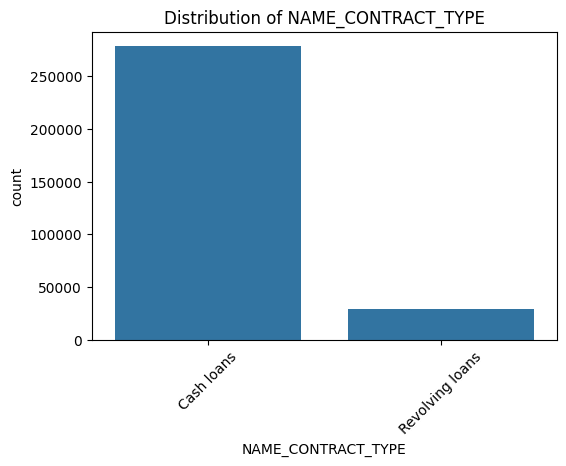

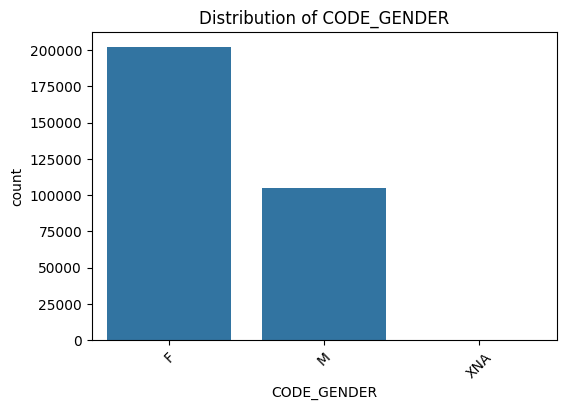

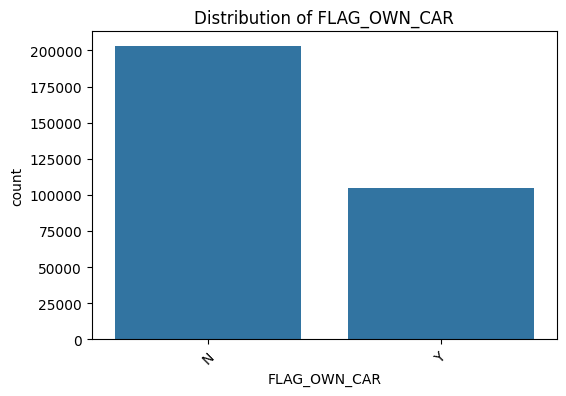

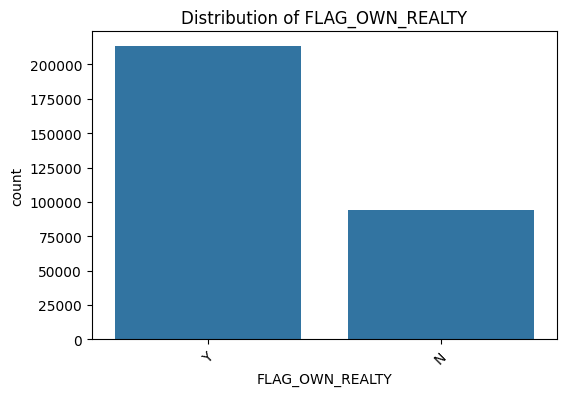

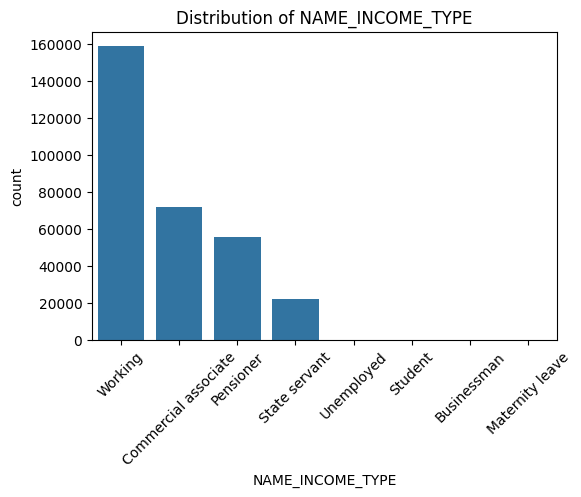

In [16]:
# Checking the distribution of the cat variables

cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


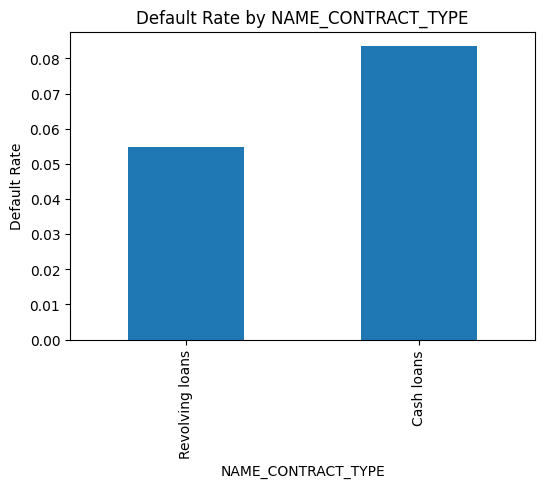

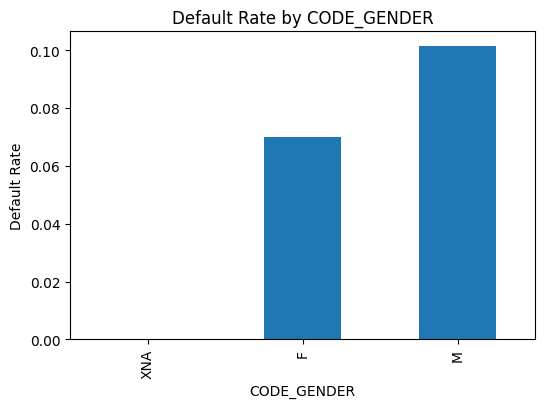

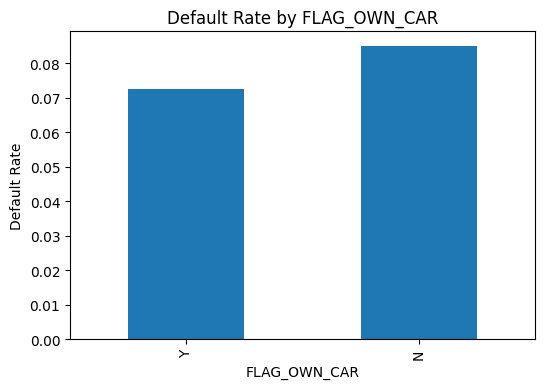

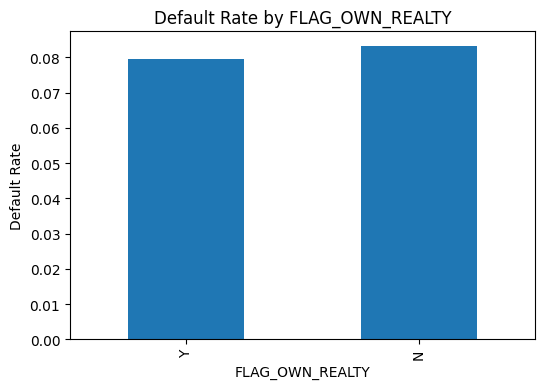

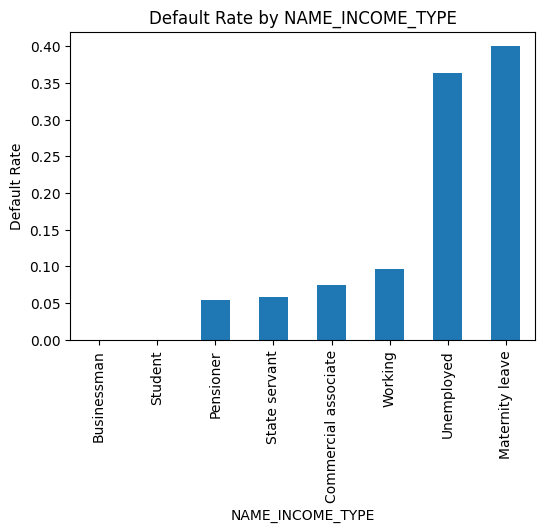

In [19]:
# Checking default rates based on the cat features

for col in cat_cols:
    default_rate = train_df.groupby(col)['TARGET'].mean().sort_values()
    default_rate.plot(kind='bar', figsize=(6,4), title=f'Default Rate by {col}')
    plt.ylabel('Default Rate')
    plt.show()


In [ ]:
# Function to detect outliers

def detect_outliers_iqr(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        print(f"{col}: {len(outliers)} outliers detected ({outlier_percentage:.2f}% of data)")


In [22]:

num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
            'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

# Runingn the outlier detection
detect_outliers_iqr(train_df, num_cols)


AMT_INCOME_TOTAL: 14035 outliers detected (4.56% of data)
AMT_CREDIT: 6562 outliers detected (2.13% of data)
AMT_ANNUITY: 7504 outliers detected (2.44% of data)
AMT_GOODS_PRICE: 14728 outliers detected (4.79% of data)
DAYS_BIRTH: 0 outliers detected (0.00% of data)
DAYS_EMPLOYED: 72217 outliers detected (23.48% of data)
CNT_FAM_MEMBERS: 4007 outliers detected (1.30% of data)


In [24]:
print(train_df['DAYS_EMPLOYED'].value_counts().head())

DAYS_EMPLOYED
-200.0    156
-224.0    152
-199.0    151
-230.0    151
-212.0    150
Name: count, dtype: int64


DROPPING MISSING VALUES

In [83]:
# Dropping columns with more than 70% missing vlaues

missing_threshold = 0.7
missing_fraction = train_df.isnull().mean()
cols_to_drop = missing_fraction[missing_fraction > missing_threshold].index.tolist()

print(f"Dropping {len(cols_to_drop)} columns with >70% missingness")
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)


Dropping 0 columns with >70% missingness


In [ ]:
# Imputing with median 

numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('TARGET')  # exclude target

for col in numerical_cols:
    median_value = train_df[col].median()
    train_df[col].fillna(median_value, inplace=True)
    test_df[col].fillna(median_value, inplace=True)


In [ ]:
# Imputing with 'unknown'

categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    train_df[col].fillna('Unknown', inplace=True)
    test_df[col].fillna('Unknown', inplace=True)


In [86]:
# label encoding categorical features

le = LabelEncoder()
for col in categorical_cols:
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])



In [87]:
# Feature Engineering

def feature_engineering(df):
    df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
    df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['EMPLOYED_AGE_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['GOODS_PRICE_CREDIT_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_CREDIT']
    df['AGE'] = -df['DAYS_BIRTH'] / 365
    return df

train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)



In [88]:
# Removing ID's

train_ids = train_df['SK_ID_CURR']
test_ids = test_df['SK_ID_CURR']
train_df = train_df.drop(columns=['SK_ID_CURR'])
test_df = test_df.drop(columns=['SK_ID_CURR'])


In [89]:
# Splitting Dataset

X = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']
X_test = test_df.copy()

# Stratified Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")


X_train shape: (246008, 125)
X_val shape: (61503, 125)


In [90]:
# Checking for missing vkaues and class distribution

print(f"Remaining missing in X_train: {X_train.isnull().sum().sum()}")
print(f"Remaining missing in X_val: {X_val.isnull().sum().sum()}")
print(f"Remaining missing in X_test: {X_test.isnull().sum().sum()}")
print(f"Class distribution:\n{y_train.value_counts(normalize=True)}")

Remaining missing in X_train: 0
Remaining missing in X_val: 0
Remaining missing in X_test: 0
Class distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [91]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


In [92]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [93]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [94]:
# Converting Data into DMatrix

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

In [95]:
# Parameters of XgBoost

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (y_train == 0).sum() / (y_train == 1).sum(),  # handle imbalance
    'seed': 42
}


In [96]:
# training the model

evals = [(dtrain, 'train'), (dval, 'validation')]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)


[0]	train-auc:0.71959	validation-auc:0.71826
[100]	train-auc:0.78897	validation-auc:0.75616
[200]	train-auc:0.81248	validation-auc:0.75967
[300]	train-auc:0.83156	validation-auc:0.76072
[364]	train-auc:0.84256	validation-auc:0.76049


In [97]:
# Evaluating the model

y_pred_val = model.predict(dval)
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"Validation AUC: {auc_score:.4f}")


Validation AUC: 0.7605


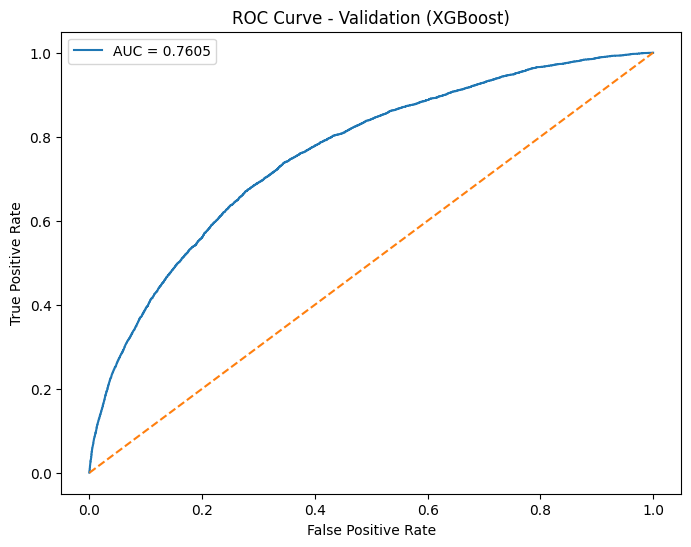

In [ ]:
# Plotting the ROC curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation (XGBoost)')
plt.legend()
plt.show()


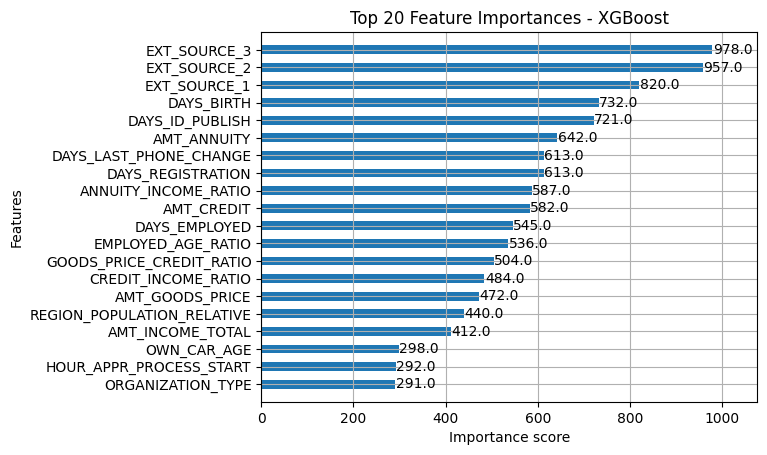

In [ ]:
# important features

xgb.plot_importance(model, max_num_features=20, height=0.5)
plt.title("Top 20 Feature Importances - XGBoost")
plt.show()


Adding Bureau.csv 

In [98]:
# importing bureau.csv and bureau_balance.csv

bureau = pd.read_csv('../data/raw/bureau.csv')
bureau_balance = pd.read_csv('../data/raw/bureau_balance.csv')

print(f"Bureau shape: {bureau.shape}")
print(f"Bureau Balance shape: {bureau_balance.shape}")

print(bureau.head())

Bureau shape: (1716428, 17)
Bureau Balance shape: (27299925, 3)
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN          

In [99]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [100]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [101]:
# One hot encoding 'STATUS'

bb = bureau_balance.copy()
bb = pd.get_dummies(bb, columns=['STATUS'], prefix='STATUS')

In [102]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [103]:
bb.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS_0', 'STATUS_1', 'STATUS_2',
       'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X'],
      dtype='object')

In [104]:
# grouping based on ID and aggregating the columns

bb_agg = bb.groupby('SK_ID_BUREAU').agg(['min', 'max', 'count', 'mean'])

# Flattening the multi level columns into one column
bb_agg.columns = ['_'.join(col).strip() for col in bb_agg.columns.values]

# Convert ID back to column from index
bb_agg.reset_index(inplace=True)


In [105]:
bb_agg.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max',
       'MONTHS_BALANCE_count', 'MONTHS_BALANCE_mean', 'STATUS_0_min',
       'STATUS_0_max', 'STATUS_0_count', 'STATUS_0_mean', 'STATUS_1_min',
       'STATUS_1_max', 'STATUS_1_count', 'STATUS_1_mean', 'STATUS_2_min',
       'STATUS_2_max', 'STATUS_2_count', 'STATUS_2_mean', 'STATUS_3_min',
       'STATUS_3_max', 'STATUS_3_count', 'STATUS_3_mean', 'STATUS_4_min',
       'STATUS_4_max', 'STATUS_4_count', 'STATUS_4_mean', 'STATUS_5_min',
       'STATUS_5_max', 'STATUS_5_count', 'STATUS_5_mean', 'STATUS_C_min',
       'STATUS_C_max', 'STATUS_C_count', 'STATUS_C_mean', 'STATUS_X_min',
       'STATUS_X_max', 'STATUS_X_count', 'STATUS_X_mean'],
      dtype='object')

In [106]:
bureau = bureau.merge(bb_agg, on='SK_ID_BUREAU', how='left')

In [107]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_min,MONTHS_BALANCE_max,MONTHS_BALANCE_count,MONTHS_BALANCE_mean,STATUS_0_min,STATUS_0_max,STATUS_0_count,STATUS_0_mean,STATUS_1_min,STATUS_1_max,STATUS_1_count,STATUS_1_mean,STATUS_2_min,STATUS_2_max,STATUS_2_count,STATUS_2_mean,STATUS_3_min,STATUS_3_max,STATUS_3_count,STATUS_3_mean,STATUS_4_min,STATUS_4_max,STATUS_4_count,STATUS_4_mean,STATUS_5_min,STATUS_5_max,STATUS_5_count,STATUS_5_mean,STATUS_C_min,STATUS_C_max,STATUS_C_count,STATUS_C_mean,STATUS_X_min,STATUS_X_max,STATUS_X_count,STATUS_X_mean
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# One Hot encoding

bureau = pd.get_dummies(bureau, columns=['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], drop_first=True)

In [109]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_min,MONTHS_BALANCE_max,MONTHS_BALANCE_count,MONTHS_BALANCE_mean,STATUS_0_min,STATUS_0_max,STATUS_0_count,STATUS_0_mean,STATUS_1_min,STATUS_1_max,STATUS_1_count,STATUS_1_mean,STATUS_2_min,STATUS_2_max,STATUS_2_count,STATUS_2_mean,STATUS_3_min,STATUS_3_max,STATUS_3_count,STATUS_3_mean,STATUS_4_min,STATUS_4_max,STATUS_4_count,STATUS_4_mean,STATUS_5_min,STATUS_5_max,STATUS_5_count,STATUS_5_mean,STATUS_C_min,STATUS_C_max,STATUS_C_count,STATUS_C_mean,STATUS_X_min,STATUS_X_max,STATUS_X_count,STATUS_X_mean,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [110]:
# Drop unneeded columns
cols_to_drop = [col for col in bureau.columns if 'CREDIT_ACTIVE' in col or 'CREDIT_CURRENCY' in col or 'CREDIT_TYPE' in col]
bureau_reduced = bureau.drop(columns=cols_to_drop + ['SK_ID_BUREAU'])

# Select columns to aggregate
num_cols = [
    'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_MAX_OVERDUE',
    'AMT_ANNUITY', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE'
]

# aggregation
bureau_agg = bureau_reduced.groupby('SK_ID_CURR')[num_cols].agg(['mean', 'min', 'max'])

# Flattening
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]
bureau_agg.reset_index(inplace=True)

In [111]:
train_df['SK_ID_CURR'] = train_ids
test_df['SK_ID_CURR'] = test_ids
train_df = pd.merge(train_df, bureau_agg, on='SK_ID_CURR', how='left')
test_df = pd.merge(test_df, bureau_agg, on='SK_ID_CURR', how='left')

In [112]:
print(bureau_agg.columns)


Index(['SK_ID_CURR', 'DAYS_CREDIT_mean', 'DAYS_CREDIT_min', 'DAYS_CREDIT_max',
       'AMT_CREDIT_SUM_mean', 'AMT_CREDIT_SUM_min', 'AMT_CREDIT_SUM_max',
       'AMT_CREDIT_MAX_OVERDUE_mean', 'AMT_CREDIT_MAX_OVERDUE_min',
       'AMT_CREDIT_MAX_OVERDUE_max', 'AMT_ANNUITY_mean', 'AMT_ANNUITY_min',
       'AMT_ANNUITY_max', 'AMT_CREDIT_SUM_DEBT_mean',
       'AMT_CREDIT_SUM_DEBT_min', 'AMT_CREDIT_SUM_DEBT_max',
       'AMT_CREDIT_SUM_LIMIT_mean', 'AMT_CREDIT_SUM_LIMIT_min',
       'AMT_CREDIT_SUM_LIMIT_max', 'AMT_CREDIT_SUM_OVERDUE_mean',
       'AMT_CREDIT_SUM_OVERDUE_min', 'AMT_CREDIT_SUM_OVERDUE_max'],
      dtype='object')


In [113]:
train_df = train_df.drop(columns=['SK_ID_CURR'])
test_df = test_df.drop(columns=['SK_ID_CURR'])

In [114]:
X = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [115]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(test_df)


In [116]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (y_train == 0).sum() / (y_train == 1).sum(),
    'seed': 42
}


In [117]:
evals = [(dtrain, 'train'), (dval, 'validation')]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)


[0]	train-auc:0.72030	validation-auc:0.71756
[100]	train-auc:0.79600	validation-auc:0.75987
[200]	train-auc:0.82146	validation-auc:0.76433
[300]	train-auc:0.84180	validation-auc:0.76579
[400]	train-auc:0.85924	validation-auc:0.76544
[405]	train-auc:0.86026	validation-auc:0.76553


In [118]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_val = model.predict(dval)
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"Validation AUC with enriched features: {auc_score:.4f}")


Validation AUC with enriched features: 0.7655


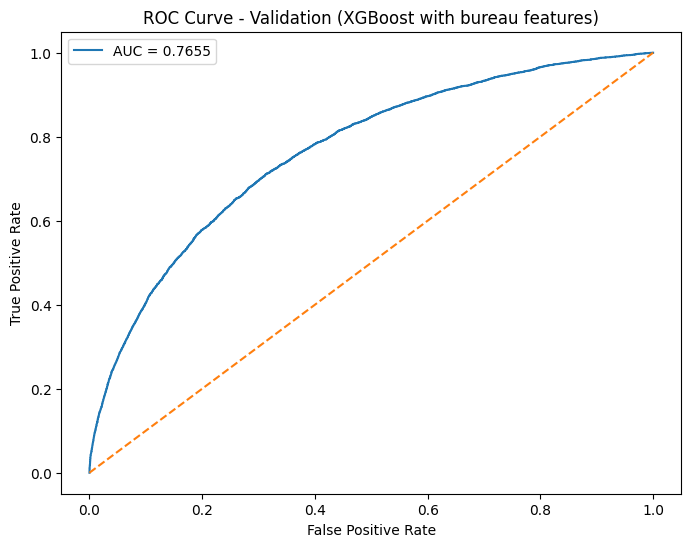

In [86]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation (XGBoost with bureau features)')
plt.legend()
plt.show()


revious_application.csv

In [119]:
# Import previous_application.csv

prev_app = pd.read_csv('../data/raw/previous_application.csv')
print(f"Previous Application shape: {prev_app.shape}")


Previous Application shape: (1670214, 37)


In [120]:
# One hot encoding

prev_app = pd.get_dummies(prev_app, columns=['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                                             'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE',
                                             'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
                                             'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
                                             'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
                                             'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
                          drop_first=True)


In [121]:
# Feature engineering

prev_app['APP_CREDIT_RATIO'] = prev_app['AMT_APPLICATION'] / prev_app['AMT_CREDIT']
prev_app['GOODS_CREDIT_RATIO'] = prev_app['AMT_GOODS_PRICE'] / prev_app['AMT_CREDIT']


In [122]:
# Select relevant numeric columns
num_cols = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
            'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_DECISION', 'APP_CREDIT_RATIO',
            'GOODS_CREDIT_RATIO']

prev_agg = prev_app.groupby('SK_ID_CURR')[num_cols].agg(['mean', 'max', 'min', 'count']).reset_index()

# Flatten columns
prev_agg.columns = ['SK_ID_CURR'] + ['_'.join(col).strip() for col in prev_agg.columns.values[1:]]


In [123]:
train_df['SK_ID_CURR'] = train_ids
test_df['SK_ID_CURR'] = test_ids
train_df = pd.merge(train_df, prev_agg, on='SK_ID_CURR', how='left')
test_df = pd.merge(test_df, prev_agg, on='SK_ID_CURR', how='left')


In [124]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)


In [125]:
# Drop SK_ID_CURR
train_df = train_df.drop(columns=['SK_ID_CURR'])
test_df = test_df.drop(columns=['SK_ID_CURR'])

X = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [126]:
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)


Index([], dtype='object')


In [127]:
print(X_val.select_dtypes(exclude=[np.number]).columns)
print(test_df.select_dtypes(exclude=[np.number]).columns)


Index([], dtype='object')
Index([], dtype='object')


In [128]:
# Check for null values

print(X_train.isnull().sum().sum())
print(X_val.isnull().sum().sum())
print(test_df.isnull().sum().sum())


0
0
0


In [129]:
# Check for infinite values

print(np.isinf(X_train.values).sum())
print(np.isinf(X_val.values).sum())
print(np.isinf(test_df.values).sum())


4
0
0


In [130]:
X_train = X_train.replace([np.inf, -np.inf], 0)

In [131]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(test_df)


In [132]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (y_train == 0).sum() / (y_train == 1).sum(),
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)

[0]	train-auc:0.71963	validation-auc:0.71591
[100]	train-auc:0.80335	validation-auc:0.76507
[200]	train-auc:0.83150	validation-auc:0.77100
[300]	train-auc:0.85214	validation-auc:0.77209
[400]	train-auc:0.86966	validation-auc:0.77222
[402]	train-auc:0.86982	validation-auc:0.77225


In [133]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_val = model.predict(dval)
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"Validation AUC after adding previous_application features: {auc_score:.4f}")


Validation AUC after adding previous_application features: 0.7723


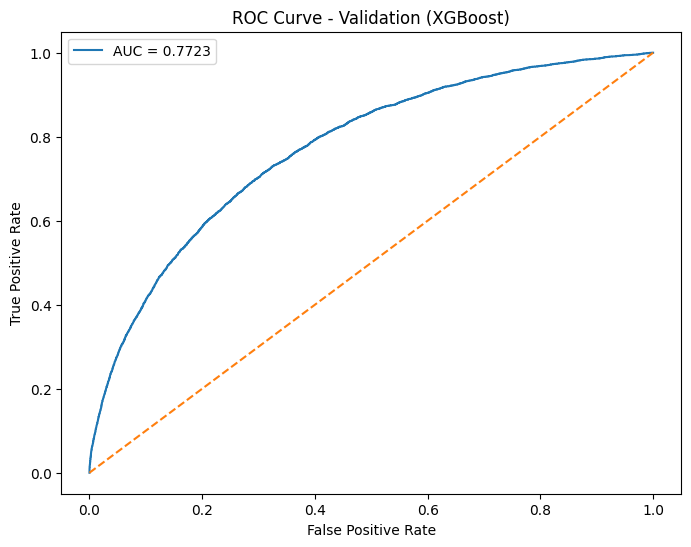

In [134]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation (XGBoost)')
plt.legend()
plt.show()

installments_payments.csv

In [135]:
# importing installments_payments.csv

installments = pd.read_csv('../data/raw/installments_payments.csv')
print(f"Installments Payments shape: {installments.shape}")


Installments Payments shape: (13605401, 8)


In [136]:
# Feature engineering

installments['PAYMENT_PERC'] = installments['AMT_PAYMENT'] / installments['AMT_INSTALMENT']
installments['PAYMENT_DIFF'] = installments['AMT_INSTALMENT'] - installments['AMT_PAYMENT']
installments['DPD'] = (installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT']).clip(lower=0)
installments['DBD'] = (installments['DAYS_INSTALMENT'] - installments['DAYS_ENTRY_PAYMENT']).clip(lower=0)


In [137]:
# grouping and aggregating 

NUM_COLS = ['NUM_INSTALMENT_VERSION', 'DPD', 'DBD', 'PAYMENT_PERC', 'PAYMENT_DIFF', 'AMT_INSTALMENT', 'AMT_PAYMENT']

installments_agg = installments.groupby('SK_ID_CURR')[NUM_COLS].agg(['mean', 'max', 'min', 'sum']).reset_index()

# Flattening columns
installments_agg.columns = ['SK_ID_CURR'] + ['_'.join(col).strip() for col in installments_agg.columns.values[1:]]


In [138]:
# Attaching ID's 

train_df['SK_ID_CURR'] = train_ids
test_df['SK_ID_CURR'] = test_ids
train_df = pd.merge(train_df, installments_agg, on='SK_ID_CURR', how='left')
test_df = pd.merge(test_df, installments_agg, on='SK_ID_CURR', how='left')


In [139]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)


In [140]:
train_df = train_df.drop(columns=['SK_ID_CURR'])
test_df = test_df.drop(columns=['SK_ID_CURR'])

X = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [141]:
# NaN check
print(X_train.isnull().sum().sum(), X_val.isnull().sum().sum(), test_df.isnull().sum().sum())

# Inf check
print(np.isinf(X_train.values).sum(), np.isinf(X_val.values).sum(), np.isinf(test_df.values).sum())

# Clean if needed
X_train = X_train.replace([np.inf, -np.inf], 0)
X_val = X_val.replace([np.inf, -np.inf], 0)
test_df = test_df.replace([np.inf, -np.inf], 0)


0 0 0
48 13 3


In [142]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(test_df)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (y_train == 0).sum() / (y_train == 1).sum(),
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)


[0]	train-auc:0.67204	validation-auc:0.66274
[100]	train-auc:0.81214	validation-auc:0.77229
[200]	train-auc:0.84104	validation-auc:0.77837
[300]	train-auc:0.86195	validation-auc:0.77963
[400]	train-auc:0.87954	validation-auc:0.78044
[491]	train-auc:0.89277	validation-auc:0.78044


In [143]:
y_pred_val = model.predict(dval)
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"Validation AUC after adding previous_application features: {auc_score:.4f}")

Validation AUC after adding previous_application features: 0.7804


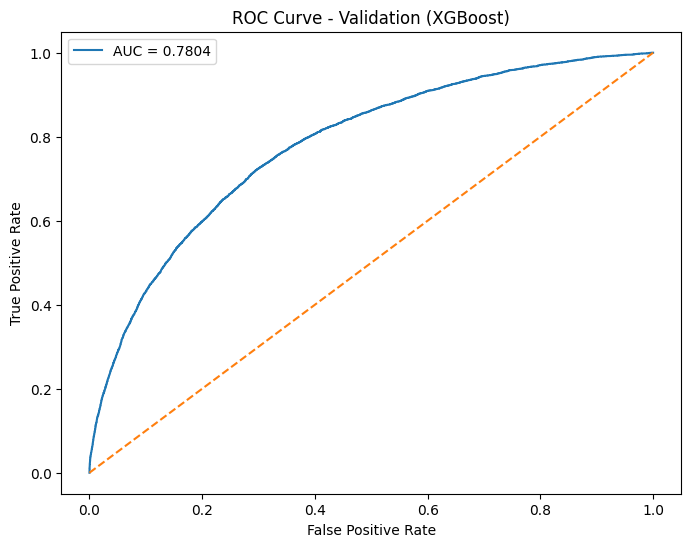

In [144]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation (XGBoost)')
plt.legend()
plt.show()

In [145]:
# import POS_CASH_balance.csv

pos_cash = pd.read_csv('../data/raw/POS_CASH_balance.csv')
print(f"POS_CASH_balance shape: {pos_cash.shape}")


POS_CASH_balance shape: (10001358, 8)


In [146]:
# One Hot Encoding

pos_cash = pd.get_dummies(pos_cash, columns=['NAME_CONTRACT_STATUS'], drop_first=True)

In [147]:
agg_dict = {
    'MONTHS_BALANCE': ['min', 'max', 'count']
}


num_cols = pos_cash.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('SK_ID_CURR')
num_cols.remove('SK_ID_PREV')
num_cols.remove('MONTHS_BALANCE')

for col in num_cols:
    agg_dict[col] = ['mean', 'max', 'min', 'sum']

pos_agg = pos_cash.groupby('SK_ID_PREV').agg(agg_dict)
pos_agg.columns = ['_'.join(col).strip() for col in pos_agg.columns.values]
pos_agg.reset_index(inplace=True)


In [148]:
# import previous-application.csv

prev_app = pd.read_csv('../data/raw/previous_application.csv')
prev_pos = prev_app[['SK_ID_PREV', 'SK_ID_CURR']].drop_duplicates()
pos_agg = pos_agg.merge(prev_pos, on='SK_ID_PREV', how='left')


In [149]:
cols_to_agg = [col for col in pos_agg.columns if col not in ['SK_ID_PREV', 'SK_ID_CURR']]

pos_final = pos_agg.groupby('SK_ID_CURR')[cols_to_agg].agg(['mean', 'max', 'min', 'sum']).reset_index()
pos_final.columns = ['SK_ID_CURR'] + ['_'.join(col).strip() for col in pos_final.columns.values[1:]]


In [150]:
# Attaching ID's 

train_df['SK_ID_CURR'] = train_ids
test_df['SK_ID_CURR'] = test_ids
train_df = pd.merge(train_df, pos_final, on='SK_ID_CURR', how='left')
test_df = pd.merge(test_df, pos_final, on='SK_ID_CURR', how='left')


In [151]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)


In [152]:
X_train = X_train.replace([np.inf, -np.inf], 0)

In [153]:
train_df = train_df.drop(columns=['SK_ID_CURR'])
test_df = test_df.drop(columns=['SK_ID_CURR'])

X = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [154]:
print(X_train.isnull().sum().sum(), X_val.isnull().sum().sum(), test_df.isnull().sum().sum())
print(np.isinf(X_train.values).sum(), np.isinf(X_val.values).sum(), np.isinf(test_df.values).sum())

# Replace Inf if necessary
X_train = X_train.replace([np.inf, -np.inf], 0)
X_val = X_val.replace([np.inf, -np.inf], 0)
test_df = test_df.replace([np.inf, -np.inf], 0)


0 0 0
48 13 0


In [155]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(test_df)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (y_train == 0).sum() / (y_train == 1).sum(),
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)


[0]	train-auc:0.72252	validation-auc:0.71737
[100]	train-auc:0.81499	validation-auc:0.77363
[200]	train-auc:0.84444	validation-auc:0.77947
[300]	train-auc:0.86566	validation-auc:0.78154
[385]	train-auc:0.87958	validation-auc:0.78144


In [156]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_val = model.predict(dval)
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"Validation AUC after adding POS_CASH_balance features: {auc_score:.4f}")


Validation AUC after adding POS_CASH_balance features: 0.7814


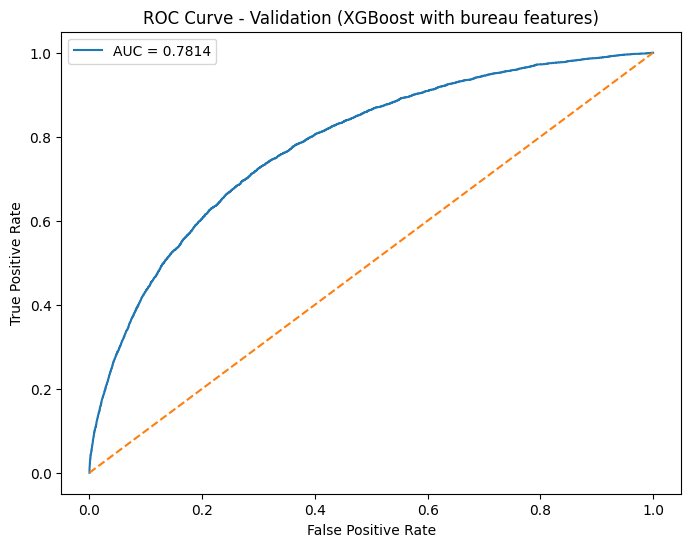

In [157]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation (XGBoost with bureau features)')
plt.legend()
plt.show()

credit_card_balance.csv

In [158]:
cc_balance = pd.read_csv('../data/raw/credit_card_balance.csv')
print(f"Credit Card Balance shape: {cc_balance.shape}")


Credit Card Balance shape: (3840312, 23)


In [159]:
cc_balance = pd.get_dummies(cc_balance, columns=['NAME_CONTRACT_STATUS'], drop_first=True)


In [160]:
agg_dict = {
    'MONTHS_BALANCE': ['min', 'max', 'count']
}

#  add all numeric columns except identifiers
num_cols = cc_balance.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('SK_ID_CURR')
num_cols.remove('SK_ID_PREV')
num_cols.remove('MONTHS_BALANCE')

for col in num_cols:
    agg_dict[col] = ['mean', 'max', 'min', 'sum']

cc_agg = cc_balance.groupby('SK_ID_PREV').agg(agg_dict)
cc_agg.columns = ['_'.join(col).strip() for col in cc_agg.columns.values]
cc_agg.reset_index(inplace=True)


In [161]:
prev_app = pd.read_csv('../data/raw/previous_application.csv')
prev_cc = prev_app[['SK_ID_PREV', 'SK_ID_CURR']].drop_duplicates()
cc_agg = cc_agg.merge(prev_cc, on='SK_ID_PREV', how='left')


In [162]:
cols_to_agg = [col for col in cc_agg.columns if col not in ['SK_ID_PREV', 'SK_ID_CURR']]

cc_final = cc_agg.groupby('SK_ID_CURR')[cols_to_agg].agg(['mean', 'max', 'min', 'sum']).reset_index()
cc_final.columns = ['SK_ID_CURR'] + ['_'.join(col).strip() for col in cc_final.columns.values[1:]]


In [163]:
train_df['SK_ID_CURR'] = train_ids
test_df['SK_ID_CURR'] = test_ids
train_df = pd.merge(train_df, cc_final, on='SK_ID_CURR', how='left')
test_df = pd.merge(test_df, cc_final, on='SK_ID_CURR', how='left')


In [164]:
train_df = train_df.drop(columns=['SK_ID_CURR'])
test_df = test_df.drop(columns=['SK_ID_CURR'])

X = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [165]:
print(X_train.isnull().sum().sum(), X_val.isnull().sum().sum(), test_df.isnull().sum().sum())
print(np.isinf(X_train.values).sum(), np.isinf(X_val.values).sum(), np.isinf(test_df.values).sum())

# Replace Inf if needed
X_train = X_train.replace([np.inf, -np.inf], 0)
X_val = X_val.replace([np.inf, -np.inf], 0)
test_df = test_df.replace([np.inf, -np.inf], 0)


59262698 14859678 11158348
48 13 0


In [166]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(test_df)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (y_train == 0).sum() / (y_train == 1).sum(),
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)


[0]	train-auc:0.70203	validation-auc:0.69275
[100]	train-auc:0.81646	validation-auc:0.77549
[200]	train-auc:0.84517	validation-auc:0.78096
[300]	train-auc:0.86617	validation-auc:0.78311
[393]	train-auc:0.88136	validation-auc:0.78342


In [167]:
y_pred_val = model.predict(dval)
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"Validation AUC after adding POS_CASH_balance features: {auc_score:.4f}")


Validation AUC after adding POS_CASH_balance features: 0.7834


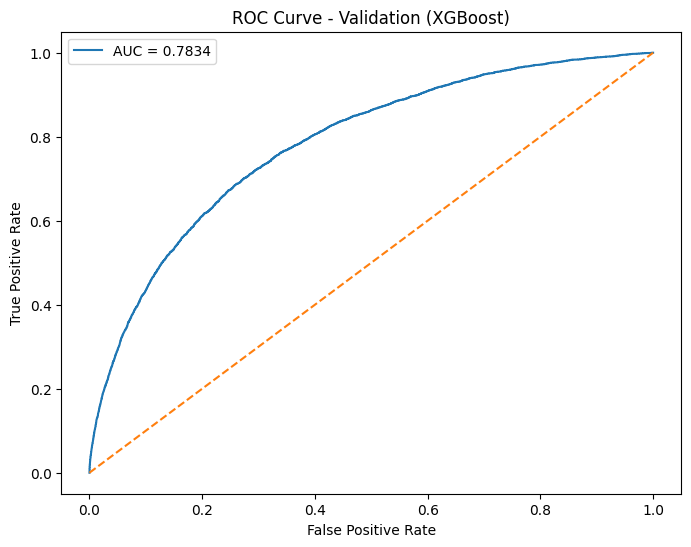

In [168]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation (XGBoost)')
plt.legend()
plt.show()

In [236]:
train_df.to_csv('../data/processed/train_aggregated.csv', index=False)
test_df.to_csv('../data/processed/test_aggregated.csv', index=False)

print("Aggregated dataframes saved successfully.")


Aggregated dataframes saved successfully.


In [238]:
# Extract feature importance as dictionary
importance_dict = model.get_score(importance_type='weight')

# Create aligned dataframe
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': [importance_dict.get(feat, 0) for feat in X_train.columns]
}).sort_values(by='importance', ascending=False)

# Save to CSV
importance_df.to_csv('../data/processed/feature_importance.csv', index=False)

print("Feature importance saved successfully.")



Feature importance saved successfully.


In [240]:
low_importance_features = importance_df[importance_df['importance'] == 0]['feature'].tolist()
print(f"Number of features to drop: {len(low_importance_features)}")


Number of features to drop: 89


In [243]:
X_train = X_train.drop(columns=[col for col in low_importance_features if col in X_train.columns])
X_val = X_val.drop(columns=[col for col in low_importance_features if col in X_val.columns])
test_df = test_df.drop(columns=[col for col in low_importance_features if col in test_df.columns])


In [244]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(test_df)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (y_train == 0).sum() / (y_train == 1).sum(),
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)


[0]	train-auc:0.70081	validation-auc:0.69056
[100]	train-auc:0.81623	validation-auc:0.77511
[200]	train-auc:0.84515	validation-auc:0.78109
[300]	train-auc:0.86590	validation-auc:0.78314
[400]	train-auc:0.88270	validation-auc:0.78358
[468]	train-auc:0.89243	validation-auc:0.78323
